In [1]:
# import numpy, matplotlib and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load housing data
housing = pd.read_csv(r"C:\Users\suhai\Downloads\price_paid_records.csv")

In [3]:
#Information on dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB


In [4]:
# First five rows
print(housing.head(5))

            Transaction unique identifier  Price  Date of Transfer  \
0  {81B82214-7FBC-4129-9F6B-4956B4A663AD}  25000  1995-08-18 00:00   
1  {8046EC72-1466-42D6-A753-4956BF7CD8A2}  42500  1995-08-09 00:00   
2  {278D581A-5BF3-4FCE-AF62-4956D87691E6}  45000  1995-06-30 00:00   
3  {1D861C06-A416-4865-973C-4956DB12CD12}  43150  1995-11-24 00:00   
4  {DD8645FD-A815-43A6-A7BA-4956E58F1874}  18899  1995-06-23 00:00   

  Property Type Old/New Duration   Town/City            District  \
0             T       N        F      OLDHAM              OLDHAM   
1             S       N        F       GRAYS            THURROCK   
2             T       N        F  HIGHBRIDGE           SEDGEMOOR   
3             T       N        F     BEDFORD  NORTH BEDFORDSHIRE   
4             S       N        F   WAKEFIELD               LEEDS   

               County PPDCategory Type Record Status - monthly file only  
0  GREATER MANCHESTER                A                                 A  
1            THURROC

In [5]:
# Last five rows
print(housing.tail(5))

                   Transaction unique identifier   Price  Date of Transfer  \
22489343  {4C4EE000-291A-1854-E050-A8C063054F34}  175000  2017-02-20 00:00   
22489344  {4C4EE000-291B-1854-E050-A8C063054F34}  586945  2017-02-15 00:00   
22489345  {4C4EE000-291C-1854-E050-A8C063054F34}  274000  2017-02-24 00:00   
22489346  {4C4EE000-291D-1854-E050-A8C063054F34}   36000  2017-02-22 00:00   
22489347  {4C4EE000-291E-1854-E050-A8C063054F34}  145000  2017-03-03 00:00   

         Property Type Old/New Duration     Town/City    District  \
22489343             S       N        F         LEEDS       LEEDS   
22489344             D       N        F      WETHERBY       LEEDS   
22489345             D       N        L  HUDDERSFIELD    KIRKLEES   
22489346             T       N        F       HALIFAX  CALDERDALE   
22489347             T       N        F         LEEDS       LEEDS   

                  County PPDCategory Type Record Status - monthly file only  
22489343  WEST YORKSHIRE              

In [6]:
# check to see if any results are null
print(np.where(pd.isnull(housing)))
# The data has no null entries

(array([], dtype=int64), array([], dtype=int64))


In [7]:
count_column = housing.shape[1]
count_row = housing.shape[0]
# show the number of columns and rows
print("Numbe of columns = ",  count_column)
print("Number of rows   = ", count_row)

Numbe of columns =  11
Number of rows   =  22489348


### UK average housing prices

In [8]:
# find each of the columns of the housing data
housing.keys()

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [9]:
# Convert the 'date' column to datetime format
housing['Date of Transfer'] = pd.to_datetime(housing['Date of Transfer'])
# Extract the year from the 'date' column and create a new 'year' column
housing['year'] = housing['Date of Transfer'].dt.year

# Group by the 'year' column and aggregate (e.g., sum, mean, count, etc.)
grouped_data = housing.groupby('year').agg({'Price': 'mean'}).reset_index()
# round to 2 decimal places
grouped_data['Price'] = grouped_data['Price'].round(2)

# Display the grouped DataFrame
print(grouped_data)

    year      Price
0   1995   67899.87
1   1996   71465.17
2   1997   78493.32
3   1998   85394.51
4   1999   95988.00
5   2000  107425.57
6   2001  118834.97
7   2002  137879.27
8   2003  155691.96
9   2004  178337.25
10  2005  189252.17
11  2006  203416.40
12  2007  219234.76
13  2008  216817.78
14  2009  213274.32
15  2010  235969.02
16  2011  232599.71
17  2012  238291.13
18  2013  256852.38
19  2014  279107.48
20  2015  296040.92
21  2016  309769.17
22  2017  328828.46


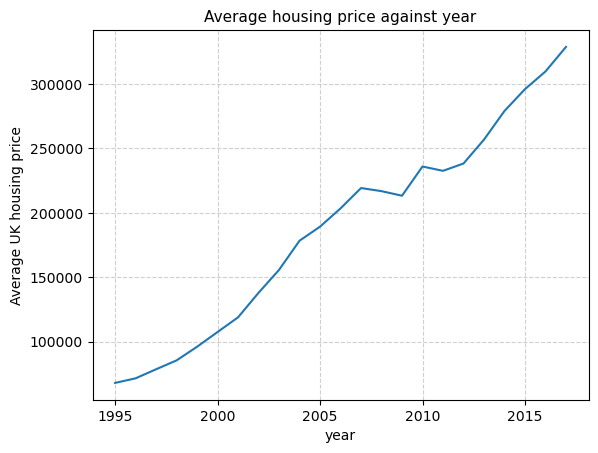

In [10]:
plt.plot(grouped_data['year'], grouped_data['Price'],'tab:blue')
plt.xlabel('year')
plt.ylabel('Average UK housing price')
plt.title('Average housing price against year', fontsize = 11)
plt.grid(True,linestyle='--', alpha=0.6)

### How many new homes vs old homes sold in Greater Manchester from 1995 to 2017

In [11]:
new = housing[housing["County"] == "GREATER MANCHESTER"]

In [12]:
house_manchester_old = housing[(housing['County'] == "GREATER MANCHESTER") & (housing['Old/New'] == "N")]
house_manchester_new = housing[(housing['County'] == "GREATER MANCHESTER") & (housing['Old/New'] == "Y")]

In [13]:
# Group by the 'year' column and aggregate (e.g., sum, mean, count, etc.)
MAN_old = house_manchester_old.groupby('year').agg({'Price': 'mean'}).reset_index()
# round to 2 decimal places
MAN_old['Price'] = MAN_old['Price'].round(2)
# Group by the 'year' column and aggregate (e.g., sum, mean, count, etc.)
MAN_new = house_manchester_new.groupby('year').agg({'Price': 'mean'}).reset_index()
# round to 2 decimal places
MAN_new['Price'] = MAN_new['Price'].round(2)

# Display the grouped DataFrame
#print(MAN_old)
#print(MAN_new)
#print(MAN_new["Price"] - MAN_old["Price"])

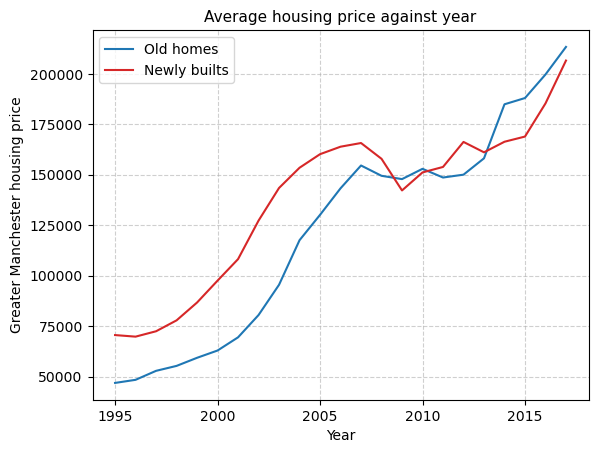

In [14]:
# plot the average housing price against year for new builts and old builts
plt.plot(MAN_old['year'], MAN_old['Price'],'tab:blue', label = 'Old homes')
plt.plot(MAN_new['year'], MAN_new['Price'], 'tab:red', label = 'Newly builts')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Greater Manchester housing price')
plt.title('Average housing price against year', fontsize = 11)
plt.grid(True,linestyle='--', alpha=0.6)

### How many homes different types of homes have been sold from 1995 to 2017

In [15]:
house_type =  house_manchester_old.groupby(['Property Type', 'year']).agg({'Price': 'mean'}).reset_index()
print(house_type[83:106])

    Property Type  year          Price
83              T  1995   32414.001045
84              T  1996   32605.540098
85              T  1997   34527.940221
86              T  1998   36318.915960
87              T  1999   37589.879749
88              T  2000   39888.655416
89              T  2001   43678.271942
90              T  2002   50164.473248
91              T  2003   61583.747575
92              T  2004   79030.631208
93              T  2005   91457.107855
94              T  2006  104245.531732
95              T  2007  113881.539207
96              T  2008  111906.782811
97              T  2009  104673.899369
98              T  2010  105169.212016
99              T  2011  103424.669549
100             T  2012  105517.987410
101             T  2013  107885.579320
102             T  2014  110895.793251
103             T  2015  118058.705706
104             T  2016  123284.092195
105             T  2017  130451.094965


In [16]:
# allias for each type of house
detached = house_type['Price'][0:23]
flat = house_type['Price'][23:46]
others = house_type['Price'][46:60]
semi_detached = house_type['Price'][60:83] 
terrace = house_type['Price'][83:106]
# put in a list
# decrease the magnitude of the other house by 2
house = [detached,flat,others/2,semi_detached,terrace]
year = [house_type['year'][0:23], house_type['year'][23:46],house_type['year'][46:60],\
        house_type['year'][60:83],house_type['year'][83:106]]

Text(0.5, 1.0, 'Average housing price for each type of house against year')

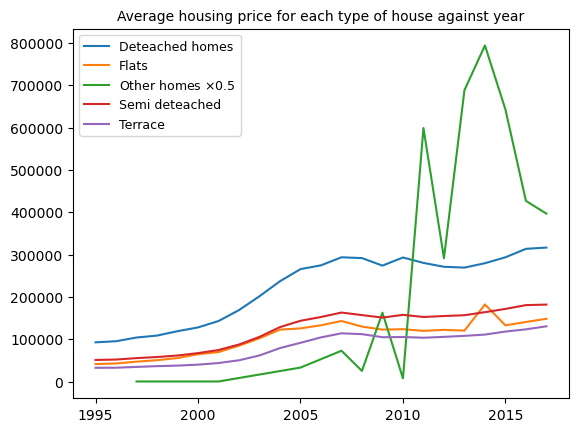

In [17]:
names = ['Deteached homes', 'Flats', r'Other homes $\times 0.5$', 'Semi deteached', 'Terrace']
for i in range(5):
    plt.plot(year[i], house[i], label = names[i])

plt.legend(fontsize = 9)
plt.title('Average housing price for each type of house against year', fontsize = 10)

### minimum, maximum, median of data set

In [18]:
housing.describe()

,Price,Date of Transfer,year
count,2.248935e+07,22489348,2.248935e+07
mean,1.782442e+05,2005-08-30 19:28:29.758558336,2.005141e+03
min,1.000000e+00,1995-01-01 00:00:00,1.995000e+03
25%,7.500000e+04,2000-06-27 00:00:00,2.000000e+03
50%,1.300000e+05,2004-11-25 00:00:00,2.004000e+03
75%,2.100000e+05,2010-11-18 00:00:00,2.010000e+03
max,9.890000e+07,2017-06-29 00:00:00,2.017000e+03
std,3.903677e+05,NaN,6.308319e+00


### Histrogram of house sales in 1995 and 2017

In [19]:
data_1995 = housing[housing['year'] == 1995]
data_2005 = housing[housing['year'] == 2005]
data_2017 = housing[housing['year'] == 2017]

In [20]:
threshold = 0.5e6
filtered_1995 = data_1995[data_1995['Price'] <= threshold]
filtered_2005 = data_2005[data_2005['Price'] <= threshold]
filtered_2017 = data_2017[data_2017['Price']<= threshold]

filtered_1995 = filtered_1995['Price']
filtered_2005 = filtered_2005['Price']
filtered_2017 = filtered_2017['Price']

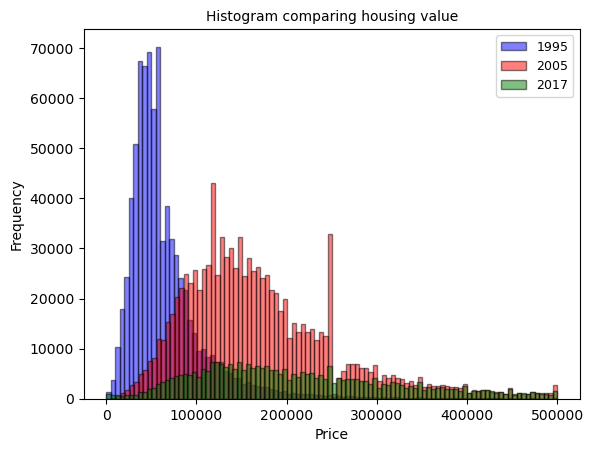

In [22]:
filtered_1995.plot.hist(bins= 100, alpha=0.5, color='blue', edgecolor='black', label = '1995')
filtered_2005.plot.hist(bins= 100, alpha=0.5, color='red', edgecolor='black', label = '2005')
filtered_2017.plot.hist(bins= 100, alpha=0.5, color='green', edgecolor='black', label ='2017')
# Add titles and labels
plt.title('Histogram comparing housing value', fontsize = 10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(fontsize = 9)
# Show the plot
plt.show()

In [ ]:
# machine learning to predict future housing prices